In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


from importlib import reload
import custom_scripts
reload(custom_scripts)
from custom_scripts import add_all_TA, get_full_stock_data

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [19]:
# Get the 'stock' data for July Corn
ticker="ZC=F"
full_stock_data = get_full_stock_data(ticker=ticker, start_date="2020-01-01", end_date="2022-12-31")

In [3]:
# Remove the direct price data from the dataset we will train on.
X = full_stock_data.drop(['Open', 'High', 'Low', 'Close', 'Adj Close'], axis=1)

# Set the close price as our "goal" dataset. E.g, use X to try and predict y
y = full_stock_data['Close']

In [4]:
# Split the data into 80% training data, and 20% testing data. E.g 2020-01-01 to ~ 2022-06-01 will be train, J
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=True)

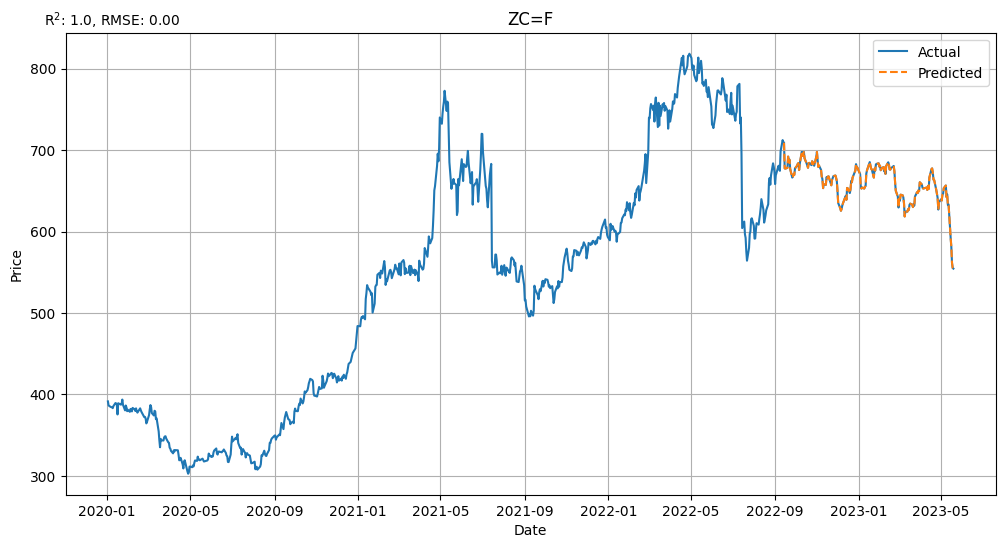

In [17]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(y_train.index, y_train.values, c='#1f77b4')
ax.plot(y_test.index, y_test.values, label='Actual', c='#1f77b4', zorder=-5)
ax.plot(y_test.index, y_pred, label='Predicted', ls='--', c='#ff7f0e')
ax.legend()
ax.set_title("{}".format(ticker))


ax.text(0.05, 1.05, r'R$^2$' + ': {}, RMSE: {:.2f}'.format(r2, rmse), transform=ax.transAxes, horizontalalignment='center', verticalalignment='top')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.grid()